## Question 1 - Multinomial Sampling
***

In [2]:
import random


def _sample_multinomial():
    boundaries = {
        0.2: "Movies",
        0.6: "COMP-551",
        0.7: "Playing",
        1.0: "Studying"
    }

    generated = random.random()
    boundary_list = list(boundaries.keys())
    for index, g in enumerate(boundary_list):
        if index == 0:
            if g > generated > 0:
                return boundaries[g]
        else:
            if g > generated > boundary_list[index - 1]:
                return boundaries[g]


def repeated_samples(num: int):

    results = {
        "Movies": 0,
        "COMP-551": 0,
        "Playing": 0,
        "Studying": 0
    }
    for i in range(num):
        results[_sample_multinomial()] += 1

    fraction_results = {
    }

    for r in results:
        fraction_results[r] = results[r] / num

    return fraction_results


if __name__ == '__main__':
    probabilities = {
        "Movies": 0.2,
        "COMP-551": 0.4,
        "Playing": 0.1,
        "Studying": 0.3
    }
    print("Sampling 100 times:")
    sum=0
    for k, v in repeated_samples(100).items():
        print(" {} : {:.2f} ( {:.2f} %)".format(k, v, 100*((v-probabilities[k])/probabilities[k])))
        sum += 100*((v-probabilities[k])/probabilities[k])
    print("Average Error: {:.2f}%".format(sum/4))
    print("\nSampling 1000 times: ")
    for k, v in repeated_samples(1000).items():
        print(" {} : {:.2f} ( {:.2f} %)".format(k, v, 100*((v-probabilities[k])/probabilities[k])))
        sum += 100 * ((v - probabilities[k]) / probabilities[k])
    print("Average Error: {:.2f}%".format(sum/4))

Sampling 100 times:
 Movies : 0.10 ( -50.00 %)
 COMP-551 : 0.34 ( -15.00 %)
 Playing : 0.13 ( 30.00 %)
 Studying : 0.43 ( 43.33 %)
Average Error: 2.08%

Sampling 1000 times: 
 Movies : 0.19 ( -5.50 %)
 COMP-551 : 0.37 ( -7.75 %)
 Playing : 0.12 ( 20.00 %)
 Studying : 0.32 ( 7.33 %)
Average Error: 5.60%


## Question 2 - Model Selection


### Question 2.1 - No Regularization:

**Visualizing without Validation Predictions:**

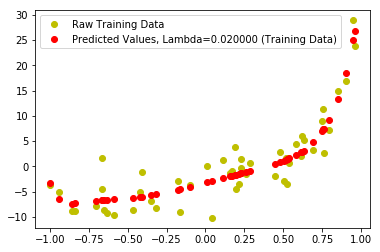

Training Data MSE:
8.857656677631018
Validation Data MSE:
9.135098784694314


In [37]:
import csv
import numpy as np
import matplotlib.pyplot as plt


def read_file(fp):
    """
    Read in a csv file and return numpy arrays for x and y values.
    :param fp:
    :return:
    """
    x = []
    y = []
    with open(fp, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
    return np.array(x), np.array(y)


def exponential(x, deg):
    """
    Constructs polynomial matrix from input vector.
    """
    matrix = []
    for i in x:
        list = []
        for j in range(deg+1):
            list.append(i ** j)
        matrix.append(list)
    matrix = np.array(matrix)
    return matrix


def computeparametres(x, y, lmb, deg):
    """
    Fit data into a polynomial and calculate the co-effecients (model parametres)
    :param x:
    :param y:
    :param lmb:
    :param deg:
    :return:
    """
    X = exponential(x, deg)
    Y = np.array(y)
    I = np.identity(deg+1)
    W = np.dot(np.linalg.inv((np.dot(np.matrix.transpose(X), X) + lmb * I)), (np.dot(np.matrix.transpose(X), Y)))
    return W


def y_predict_set(w, x):
    """
    Predict y values for the given exponentiated x matrix.
    :param w:
    :param x:
    :return:
    """
    y = [ y_predict_value(w, i) for i in x ]
    return np.array(y)


def y_predict_value(w, x):
    """
    Predict y value for the given x row.
    :param w:
    :param x:
    :return:
    """
    return np.dot(w,x)


def computeMSE(ypred, y):
    """
    Compute the mean squared error between two data vectors.
    :param ypred:
    :param y:
    :return:
    """
    return np.square(np.subtract(ypred,y)).mean()


if __name__ == '__main__':
    x_train, y_train = read_file('data/Dataset_1_train.csv')
    lamb = 0.02

    plt.plot(x_train, y_train, 'yo')
    w_train = computeparametres(x_train, y_train, lamb, 20)
    plt.plot(x_train, y_predict_set(w_train,exponential(x_train, 20)), 'ro')

    x_valid, y_valid = read_file('data/Dataset_1_valid.csv')
    plt.legend(["Raw Training Data", "Predicted Values, Lambda={:f} (Training Data)".format(lamb)])

    plt.show()

    print("Training Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_train, 20)), y_train))
    print("Validation Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_valid, 20)), y_valid))



**With validation predictions:**

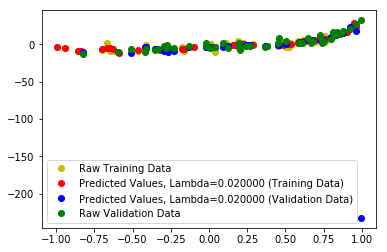

Training Data MSE:
6.4750601542578305
Validation Data MSE:
1415.7667845050064


In [38]:
import csv
import numpy as np
import matplotlib.pyplot as plt


def read_file(fp):
    """
    Read in a csv file and return numpy arrays for x and y values.
    :param fp:
    :return:
    """
    x = []
    y = []
    with open(fp, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
    return np.array(x), np.array(y)


def exponential(x, deg):
    """
    Constructs polynomial matrix from input vector.
    """
    matrix = []
    for i in x:
        list = []
        for j in range(deg+1):
            list.append(i ** j)
        matrix.append(list)
    matrix = np.array(matrix)
    return matrix


def computeparametres(x, y, lmb, deg):
    """
    Fit data into a polynomial and calculate the co-effecients (model parametres)
    :param x:
    :param y:
    :param lmb:
    :param deg:
    :return:
    """
    X = exponential(x, deg)
    Y = np.array(y)
    I = np.identity(deg+1)
    W = np.dot(np.linalg.inv((np.dot(np.matrix.transpose(X), X) + lmb * I)), (np.dot(np.matrix.transpose(X), Y)))
    return W


def y_predict_set(w, x):
    """
    Predict y values for the given exponentiated x matrix.
    :param w:
    :param x:
    :return:
    """
    y = [ y_predict_value(w, i) for i in x ]
    return np.array(y)


def y_predict_value(w, x):
    """
    Predict y value for the given x row.
    :param w:
    :param x:
    :return:
    """
    return np.dot(w,x)


def computeMSE(ypred, y):
    """
    Compute the mean squared error between two data vectors.
    :param ypred:
    :param y:
    :return:
    """
    return np.square(np.subtract(ypred,y)).mean()


if __name__ == '__main__':
    x_train, y_train = read_file('data/Dataset_1_train.csv')
    lamb = 0.02

    plt.plot(x_train, y_train, 'yo')
    w_train = computeparametres(x_train, y_train, 0, 20)
    plt.plot(x_train, y_predict_set(w_train,exponential(x_train, 20)), 'ro')

    x_valid, y_valid = read_file('data/Dataset_1_valid.csv')
    plt.plot(x_valid, y_predict_set(w_train, exponential(x_valid, 20)), 'bo')
    plt.plot(x_valid, y_valid, 'go')
    plt.legend(["Raw Training Data", "Predicted Values, Lambda={:f} (Training Data)".format(lamb), "Predicted Values, Lambda={:f} (Validation Data)".format(lamb), "Raw Validation Data"])

    plt.show()

    print("Training Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_train, 20)), y_train))
    print("Validation Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_valid, 20)), y_valid))

### Question 2.2 - L2 Regularization:
**Without validation predictions:**

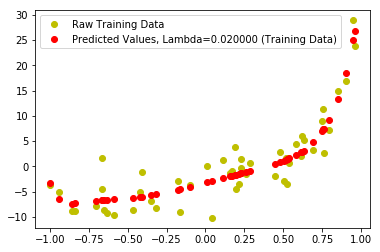

Training Data MSE:
8.857656677631018
Validation Data MSE:
9.135098784694314


In [40]:
import csv
import numpy as np
import matplotlib.pyplot as plt


def read_file(fp):
    """
    Read in a csv file and return numpy arrays for x and y values.
    :param fp:
    :return:
    """
    x = []
    y = []
    with open(fp, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
    return np.array(x), np.array(y)


def exponential(x, deg):
    """
    Constructs polynomial matrix from input vector.
    """
    matrix = []
    for i in x:
        list = []
        for j in range(deg+1):
            list.append(i ** j)
        matrix.append(list)
    matrix = np.array(matrix)
    return matrix


def computeparametres(x, y, lmb, deg):
    """
    Fit data into a polynomial and calculate the co-effecients (model parametres)
    :param x:
    :param y:
    :param lmb:
    :param deg:
    :return:
    """
    X = exponential(x, deg)
    Y = np.array(y)
    I = np.identity(deg+1)
    W = np.dot(np.linalg.inv((np.dot(np.matrix.transpose(X), X) + lmb * I)), (np.dot(np.matrix.transpose(X), Y)))
    return W


def y_predict_set(w, x):
    """
    Predict y values for the given exponentiated x matrix.
    :param w:
    :param x:
    :return:
    """
    y = [ y_predict_value(w, i) for i in x ]
    return np.array(y)


def y_predict_value(w, x):
    """
    Predict y value for the given x row.
    :param w:
    :param x:
    :return:
    """
    return np.dot(w,x)


def computeMSE(ypred, y):
    """
    Compute the mean squared error between two data vectors.
    :param ypred:
    :param y:
    :return:
    """
    return np.square(np.subtract(ypred,y)).mean()


if __name__ == '__main__':
    x_train, y_train = read_file('data/Dataset_1_train.csv')
    
    lamb=0.02
    
    plt.plot(x_train, y_train, 'yo')
    w_train = computeparametres(x_train, y_train, lamb, 20)
    plt.plot(x_train, y_predict_set(w_train,exponential(x_train, 20)), 'ro')

    x_valid, y_valid = read_file('data/Dataset_1_valid.csv')
    plt.legend(["Raw Training Data", "Predicted Values, Lambda={:f} (Training Data)".format(lamb)])

    plt.show()

    print("Training Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_train, 20)), y_train))
    print("Validation Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_valid, 20)), y_valid))



**With validation predictions:**

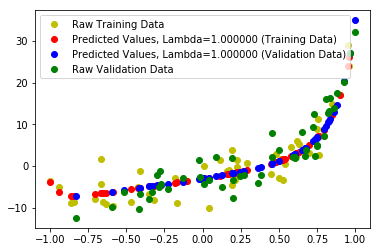

Training Data MSE:
9.20504017090436
Validation Data MSE:
9.699253211677858


In [50]:
import csv
import numpy as np
import matplotlib.pyplot as plt


def read_file(fp):
    """
    Read in a csv file and return numpy arrays for x and y values.
    :param fp:
    :return:
    """
    x = []
    y = []
    with open(fp, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
    return np.array(x), np.array(y)


def exponential(x, deg):
    """
    Constructs polynomial matrix from input vector.
    """
    matrix = []
    for i in x:
        list = []
        for j in range(deg+1):
            list.append(i ** j)
        matrix.append(list)
    matrix = np.array(matrix)
    return matrix


def computeparametres(x, y, lmb, deg):
    """
    Fit data into a polynomial and calculate the co-effecients (model parametres)
    :param x:
    :param y:
    :param lmb:
    :param deg:
    :return:
    """
    X = exponential(x, deg)
    Y = np.array(y)
    I = np.identity(deg+1)
    W = np.dot(np.linalg.inv((np.dot(np.matrix.transpose(X), X) + lmb * I)), (np.dot(np.matrix.transpose(X), Y)))
    return W


def y_predict_set(w, x):
    """
    Predict y values for the given exponentiated x matrix.
    :param w:
    :param x:
    :return:
    """
    y = [ y_predict_value(w, i) for i in x ]
    return np.array(y)


def y_predict_value(w, x):
    """
    Predict y value for the given x row.
    :param w:
    :param x:
    :return:
    """
    return np.dot(w,x)


def computeMSE(ypred, y):
    """
    Compute the mean squared error between two data vectors.
    :param ypred:
    :param y:
    :return:
    """
    return np.square(np.subtract(ypred,y)).mean()


if __name__ == '__main__':
    x_train, y_train = read_file('data/Dataset_1_train.csv')
    
    lamb = 1

    plt.plot(x_train, y_train, 'yo')
    w_train = computeparametres(x_train, y_train, lamb, 20)
    plt.plot(x_train, y_predict_set(w_train,exponential(x_train, 20)), 'ro')

    x_valid, y_valid = read_file('data/Dataset_1_valid.csv')
    plt.plot(x_valid, y_predict_set(w_train, exponential(x_valid, 20)), 'bo')
    plt.plot(x_valid, y_valid, 'go')
    plt.legend(["Raw Training Data", "Predicted Values, Lambda={:f} (Training Data)".format(lamb), "Predicted Values, Lambda={:f} (Validation Data)".format(lamb), "Raw Validation Data"])

    plt.show()

    print("Training Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_train, 20)), y_train))
    print("Validation Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_valid, 20)), y_valid))



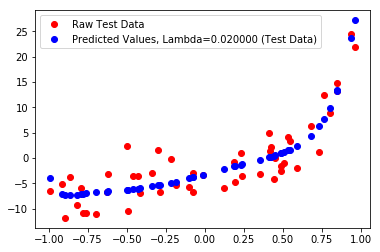

Training Data MSE:
8.857656677631018
Validation Data MSE:
9.135098784694314
Testing Data MSE:
130.84316654182413


In [51]:
import csv
import numpy as np
import matplotlib.pyplot as plt


def read_file(fp):
    """
    Read in a csv file and return numpy arrays for x and y values.
    :param fp:
    :return:
    """
    x = []
    y = []
    with open(fp, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
    return np.array(x), np.array(y)


def exponential(x, deg):
    """
    Constructs polynomial matrix from input vector.
    """
    matrix = []
    for i in x:
        list = []
        for j in range(deg+1):
            list.append(i ** j)
        matrix.append(list)
    matrix = np.array(matrix)
    return matrix


def computeparametres(x, y, lmb, deg):
    """
    Fit data into a polynomial and calculate the co-effecients (model parametres)
    :param x:
    :param y:
    :param lmb:
    :param deg:
    :return:
    """
    X = exponential(x, deg)
    Y = np.array(y)
    I = np.identity(deg+1)
    W = np.dot(np.linalg.inv((np.dot(np.matrix.transpose(X), X) + lmb * I)), (np.dot(np.matrix.transpose(X), Y)))
    return W


def y_predict_set(w, x):
    """
    Predict y values for the given exponentiated x matrix.
    :param w:
    :param x:
    :return:
    """
    y = [ y_predict_value(w, i) for i in x ]
    return np.array(y)


def y_predict_value(w, x):
    """
    Predict y value for the given x row.
    :param w:
    :param x:
    :return:
    """
    return np.dot(w,x)


def computeMSE(ypred, y):
    """
    Compute the mean squared error between two data vectors.
    :param ypred:
    :param y:
    :return:
    """
    return np.square(np.subtract(ypred,y)).mean()


if __name__ == '__main__':
    x_train, y_train = read_file('data/Dataset_1_train.csv')
    
    lamb = 0.02

    w_train = computeparametres(x_train, y_train, lamb, 20)

    x_valid, y_valid = read_file('data/Dataset_1_valid.csv')


    x_test, y_test = read_file('data/Dataset_1_test.csv')
    plt.plot(x_test, y_test, 'ro')
    plt.plot(x_test, y_predict_set(w_train, exponential(x_test, 20)), 'bo')
    plt.legend(["Raw Test Data", "Predicted Values, Lambda={:f} (Test Data)".format(lamb)])

    plt.show()

    print("Training Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_train, 20)), y_train))
    print("Validation Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_valid, 20)), y_valid))
    print("Testing Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_valid, 20)), y_test))



## Question 3
### Question 3-1: SGD Plots
**Scroll down for Plot**

SCROLL DOWN FOR PLOT
MSE for Epoch #1: 36.472578287020845
MSE for Epoch #2: 36.4366148522359
MSE for Epoch #3: 36.40068704963892
MSE for Epoch #4: 36.3647948463315
MSE for Epoch #5: 36.32893822865053
MSE for Epoch #6: 36.29311715345382
MSE for Epoch #7: 36.25733159739123
MSE for Epoch #8: 36.221581475921745
MSE for Epoch #9: 36.185866823813356
MSE for Epoch #10: 36.150187556736334
MSE for Epoch #11: 36.11454363162984
MSE for Epoch #12: 36.07893503915288
MSE for Epoch #13: 36.04336172443226
MSE for Epoch #14: 36.00782367232797
MSE for Epoch #15: 35.97232087355323
MSE for Epoch #16: 35.93685321596891
MSE for Epoch #17: 35.90142072710808
MSE for Epoch #18: 35.866023336676356
MSE for Epoch #19: 35.83066106096272
MSE for Epoch #20: 35.795333782277055
MSE for Epoch #21: 35.7600415655092
MSE for Epoch #22: 35.724784294357725
MSE for Epoch #23: 35.68956194464568
MSE for Epoch #24: 35.654374492699176
MSE for Epoch #25: 35.61922191488421
MSE for Epoch #26: 35.58410418138494
MSE for Epoch #27: 35

MSE for Epoch #240: 28.816005794165985
MSE for Epoch #241: 28.787629605622783
MSE for Epoch #242: 28.75928155692869
MSE for Epoch #243: 28.730961586220086
MSE for Epoch #244: 28.70266966807687
MSE for Epoch #245: 28.67440580401894
MSE for Epoch #246: 28.646169932062808
MSE for Epoch #247: 28.617962038998773
MSE for Epoch #248: 28.58978210307542
MSE for Epoch #249: 28.56163007944687
MSE for Epoch #250: 28.53350595363665
MSE for Epoch #251: 28.50540968721178
MSE for Epoch #252: 28.477341228436725
MSE for Epoch #253: 28.449300609344697
MSE for Epoch #254: 28.421287771601087
MSE for Epoch #255: 28.393302709010435
MSE for Epoch #256: 28.365345340750842
MSE for Epoch #257: 28.337415686114877
MSE for Epoch #258: 28.30951370393317
MSE for Epoch #259: 28.281639351506556
MSE for Epoch #260: 28.253792656508157
MSE for Epoch #261: 28.225973539178153
MSE for Epoch #262: 28.198181959705238
MSE for Epoch #263: 28.17041794073154
MSE for Epoch #264: 28.1426814314998
MSE for Epoch #265: 28.1149724296913

MSE for Epoch #485: 22.64058866656659
MSE for Epoch #486: 22.618330620706814
MSE for Epoch #487: 22.596094628659344
MSE for Epoch #488: 22.57388064452783
MSE for Epoch #489: 22.551688657120216
MSE for Epoch #490: 22.529518667575275
MSE for Epoch #491: 22.507370658834088
MSE for Epoch #492: 22.485244592291878
MSE for Epoch #493: 22.46314041252128
MSE for Epoch #494: 22.441058144892278
MSE for Epoch #495: 22.418997727392803
MSE for Epoch #496: 22.396959201998083
MSE for Epoch #497: 22.374942477513915
MSE for Epoch #498: 22.352947566736734
MSE for Epoch #499: 22.330974415786045
MSE for Epoch #500: 22.30902305348207
MSE for Epoch #501: 22.28709343797133
MSE for Epoch #502: 22.265185558889083
MSE for Epoch #503: 22.243299382154284
MSE for Epoch #504: 22.221434885567625
MSE for Epoch #505: 22.19959203411419
MSE for Epoch #506: 22.1777708462019
MSE for Epoch #507: 22.155971262542643
MSE for Epoch #508: 22.134193275309595
MSE for Epoch #509: 22.112436864348407
MSE for Epoch #510: 22.0907019792

MSE for Epoch #718: 18.007373393815268
MSE for Epoch #719: 17.989704395606317
MSE for Epoch #720: 17.97205290744907
MSE for Epoch #721: 17.954418899073623
MSE for Epoch #722: 17.936802359994267
MSE for Epoch #723: 17.91920327577061
MSE for Epoch #724: 17.901621608217724
MSE for Epoch #725: 17.884057351145717
MSE for Epoch #726: 17.86651048720724
MSE for Epoch #727: 17.848980985725294
MSE for Epoch #728: 17.83146886686644
MSE for Epoch #729: 17.81397408855733
MSE for Epoch #730: 17.796496627845823
MSE for Epoch #731: 17.779036477151646
MSE for Epoch #732: 17.761593608461748
MSE for Epoch #733: 17.74416803188789
MSE for Epoch #734: 17.72675970221504
MSE for Epoch #735: 17.709368604547283
MSE for Epoch #736: 17.691994741517135
MSE for Epoch #737: 17.67463808301056
MSE for Epoch #738: 17.65729859884374
MSE for Epoch #739: 17.639976297120032
MSE for Epoch #740: 17.62267113892005
MSE for Epoch #741: 17.605383122108876
MSE for Epoch #742: 17.588112218889645
MSE for Epoch #743: 17.570858427621

MSE for Epoch #937: 14.52714520131096
MSE for Epoch #938: 14.512922344565546
MSE for Epoch #939: 14.498713563207941
MSE for Epoch #940: 14.484518848990406
MSE for Epoch #941: 14.47033820141359
MSE for Epoch #942: 14.456171583681014
MSE for Epoch #943: 14.442018985128259
MSE for Epoch #944: 14.42788042607354
MSE for Epoch #945: 14.413755850974008
MSE for Epoch #946: 14.399645234731144
MSE for Epoch #947: 14.385548599350921
MSE for Epoch #948: 14.371465924191074
MSE for Epoch #949: 14.35739721237285
MSE for Epoch #950: 14.343342425806572
MSE for Epoch #951: 14.329301550203105
MSE for Epoch #952: 14.315274564984245
MSE for Epoch #953: 14.301261457715018
MSE for Epoch #954: 14.287262237021997
MSE for Epoch #955: 14.273276875480107
MSE for Epoch #956: 14.259305352025558
MSE for Epoch #957: 14.245347652712303
MSE for Epoch #958: 14.231403793309614
MSE for Epoch #959: 14.21747373397414
MSE for Epoch #960: 14.203557431516531
MSE for Epoch #961: 14.189654924588135
MSE for Epoch #962: 14.1757661

MSE for Epoch #1183: 11.420413167753532
MSE for Epoch #1184: 11.409265605863085
MSE for Epoch #1185: 11.39812908651902
MSE for Epoch #1186: 11.387003599553571
MSE for Epoch #1187: 11.375889107369652
MSE for Epoch #1188: 11.364785621904526
MSE for Epoch #1189: 11.353693141267746
MSE for Epoch #1190: 11.34261162723722
MSE for Epoch #1191: 11.331541064330514
MSE for Epoch #1192: 11.320481460723654
MSE for Epoch #1193: 11.309432809615357
MSE for Epoch #1194: 11.298395087361637
MSE for Epoch #1195: 11.287368288012535
MSE for Epoch #1196: 11.276352419164327
MSE for Epoch #1197: 11.265347431192017
MSE for Epoch #1198: 11.254353336207592
MSE for Epoch #1199: 11.243370131781832
MSE for Epoch #1200: 11.2323978083642
MSE for Epoch #1201: 11.221436332360957
MSE for Epoch #1202: 11.210485704240105
MSE for Epoch #1203: 11.199545911903675
MSE for Epoch #1204: 11.188616930820631
MSE for Epoch #1205: 11.17769878180644
MSE for Epoch #1206: 11.166791432729552
MSE for Epoch #1207: 11.155894883053117
MSE f

MSE for Epoch #1430: 8.976581983447215
MSE for Epoch #1431: 8.967852600838697
MSE for Epoch #1432: 8.959131844825123
MSE for Epoch #1433: 8.950419731050975
MSE for Epoch #1434: 8.9417162345335
MSE for Epoch #1435: 8.933021336971358
MSE for Epoch #1436: 8.924335040036532
MSE for Epoch #1437: 8.915657356461288
MSE for Epoch #1438: 8.90698823981431
MSE for Epoch #1439: 8.898327699659687
MSE for Epoch #1440: 8.889675741253308
MSE for Epoch #1441: 8.881032338622246
MSE for Epoch #1442: 8.872397476753278
MSE for Epoch #1443: 8.86377117687001
MSE for Epoch #1444: 8.85515339601131
MSE for Epoch #1445: 8.846544140568755
MSE for Epoch #1446: 8.837943390369169
MSE for Epoch #1447: 8.829351167353778
MSE for Epoch #1448: 8.820767432159874
MSE for Epoch #1449: 8.812192192557786
MSE for Epoch #1450: 8.803625435496757
MSE for Epoch #1451: 8.795067161742873
MSE for Epoch #1452: 8.786517346584693
MSE for Epoch #1453: 8.777975995095579
MSE for Epoch #1454: 8.769443093936074
MSE for Epoch #1455: 8.7609186

MSE for Epoch #1680: 7.042289737049282
MSE for Epoch #1681: 7.035473479482207
MSE for Epoch #1682: 7.028663962518108
MSE for Epoch #1683: 7.02186117801993
MSE for Epoch #1684: 7.015065113700256
MSE for Epoch #1685: 7.008275761741604
MSE for Epoch #1686: 7.00149313514151
MSE for Epoch #1687: 6.994717220488464
MSE for Epoch #1688: 6.987948000302206
MSE for Epoch #1689: 6.981185460152241
MSE for Epoch #1690: 6.97442960878122
MSE for Epoch #1691: 6.967680461313755
MSE for Epoch #1692: 6.960937979675347
MSE for Epoch #1693: 6.954202158588762
MSE for Epoch #1694: 6.947473009856017
MSE for Epoch #1695: 6.940750513878739
MSE for Epoch #1696: 6.934034663728077
MSE for Epoch #1697: 6.927325453323
MSE for Epoch #1698: 6.920622875125573
MSE for Epoch #1699: 6.913926925840876
MSE for Epoch #1700: 6.907237584799163
MSE for Epoch #1701: 6.9005548686358384
MSE for Epoch #1702: 6.893878759512981
MSE for Epoch #1703: 6.887209247881414
MSE for Epoch #1704: 6.880546332062747
MSE for Epoch #1705: 6.8738900

MSE for Epoch #1932: 5.521183442666809
MSE for Epoch #1933: 5.515870846150242
MSE for Epoch #1934: 5.510563509891519
MSE for Epoch #1935: 5.505261425523755
MSE for Epoch #1936: 5.499964573322606
MSE for Epoch #1937: 5.494672961397265
MSE for Epoch #1938: 5.489386564852565
MSE for Epoch #1939: 5.484105406591929
MSE for Epoch #1940: 5.478829469547443
MSE for Epoch #1941: 5.473558749460694
MSE for Epoch #1942: 5.468293230431437
MSE for Epoch #1943: 5.4630329110038645
MSE for Epoch #1944: 5.457777787140396
MSE for Epoch #1945: 5.452527859511638
MSE for Epoch #1946: 5.447283118799486
MSE for Epoch #1947: 5.442043570284694
MSE for Epoch #1948: 5.436809194882942
MSE for Epoch #1949: 5.431579984665428
MSE for Epoch #1950: 5.426355950560559
MSE for Epoch #1951: 5.421137072406704
MSE for Epoch #1952: 5.415923350011655
MSE for Epoch #1953: 5.41071478858992
MSE for Epoch #1954: 5.405511363446991
MSE for Epoch #1955: 5.40031308823704
MSE for Epoch #1956: 5.395119938165141
MSE for Epoch #1957: 5.389

MSE for Epoch #2161: 4.4319375005391075
MSE for Epoch #2162: 4.427701045543878
MSE for Epoch #2163: 4.423468779014659
MSE for Epoch #2164: 4.419240693877269
MSE for Epoch #2165: 4.415016792875468
MSE for Epoch #2166: 4.410797061625222
MSE for Epoch #2167: 4.406581493446151
MSE for Epoch #2168: 4.402370080621386
MSE for Epoch #2169: 4.3981628337178025
MSE for Epoch #2170: 4.393959754322205
MSE for Epoch #2171: 4.389760809257035
MSE for Epoch #2172: 4.385566019989248
MSE for Epoch #2173: 4.381375378004286
MSE for Epoch #2174: 4.377188856710485
MSE for Epoch #2175: 4.373006477462583
MSE for Epoch #2176: 4.368828236505439
MSE for Epoch #2177: 4.364654115796842
MSE for Epoch #2178: 4.360484125373199
MSE for Epoch #2179: 4.356318253382501
MSE for Epoch #2180: 4.352156495931509
MSE for Epoch #2181: 4.347998843019161
MSE for Epoch #2182: 4.343845300040075
MSE for Epoch #2183: 4.3396958508584795
MSE for Epoch #2184: 4.335550497896777
MSE for Epoch #2185: 4.331409238100445
MSE for Epoch #2186: 4

MSE for Epoch #2391: 3.559895814729843
MSE for Epoch #2392: 3.5565203762062247
MSE for Epoch #2393: 3.5531482594086214
MSE for Epoch #2394: 3.5497794732380936
MSE for Epoch #2395: 3.5464140029835938
MSE for Epoch #2396: 3.5430518628933525
MSE for Epoch #2397: 3.5396930466824763
MSE for Epoch #2398: 3.5363375312387277
MSE for Epoch #2399: 3.532985334550114
MSE for Epoch #2400: 3.5296364450841993
MSE for Epoch #2401: 3.526290858428276
MSE for Epoch #2402: 3.52294857246031
MSE for Epoch #2403: 3.5196095847454827
MSE for Epoch #2404: 3.5162738922463523
MSE for Epoch #2405: 3.5129414994349855
MSE for Epoch #2406: 3.509612389234921
MSE for Epoch #2407: 3.506286565935733
MSE for Epoch #2408: 3.502964031145886
MSE for Epoch #2409: 3.499644774190794
MSE for Epoch #2410: 3.4963287984047584
MSE for Epoch #2411: 3.493016083892868
MSE for Epoch #2412: 3.4897066364666727
MSE for Epoch #2413: 3.4864004641654702
MSE for Epoch #2414: 3.4830975436374048
MSE for Epoch #2415: 3.4797978875418702
MSE for Ep

MSE for Epoch #2598: 2.9276361503661144
MSE for Epoch #2599: 2.9248845275250686
MSE for Epoch #2600: 2.92213561120788
MSE for Epoch #2601: 2.9193894054032676
MSE for Epoch #2602: 2.9166459070440682
MSE for Epoch #2603: 2.913905127609368
MSE for Epoch #2604: 2.9111670425541645
MSE for Epoch #2605: 2.908431657400001
MSE for Epoch #2606: 2.905698973258303
MSE for Epoch #2607: 2.902968974160743
MSE for Epoch #2608: 2.9002416771943755
MSE for Epoch #2609: 2.8975170747215837
MSE for Epoch #2610: 2.894795145392104
MSE for Epoch #2611: 2.892075908793724
MSE for Epoch #2612: 2.88935935496076
MSE for Epoch #2613: 2.886645471908492
MSE for Epoch #2614: 2.8839342707596303
MSE for Epoch #2615: 2.8812257436507833
MSE for Epoch #2616: 2.8785198883650076
MSE for Epoch #2617: 2.8758167074213157
MSE for Epoch #2618: 2.8731161853795344
MSE for Epoch #2619: 2.8704183266696446
MSE for Epoch #2620: 2.86772312319489
MSE for Epoch #2621: 2.865030578910465
MSE for Epoch #2622: 2.8623406872855632
MSE for Epoch 

MSE for Epoch #2827: 2.3633400125303856
MSE for Epoch #2828: 2.361144707793733
MSE for Epoch #2829: 2.3589515685807854
MSE for Epoch #2830: 2.3567605938726524
MSE for Epoch #2831: 2.3545717811990126
MSE for Epoch #2832: 2.352385119745815
MSE for Epoch #2833: 2.350200615579238
MSE for Epoch #2834: 2.348018269562962
MSE for Epoch #2835: 2.345838066549231
MSE for Epoch #2836: 2.34366001567853
MSE for Epoch #2837: 2.3414841062539544
MSE for Epoch #2838: 2.3393103363612626
MSE for Epoch #2839: 2.3371387145414317
MSE for Epoch #2840: 2.334969236010221
MSE for Epoch #2841: 2.3328018949185694
MSE for Epoch #2842: 2.330636686421517
MSE for Epoch #2843: 2.32847360838128
MSE for Epoch #2844: 2.326312674467731
MSE for Epoch #2845: 2.324153854506316
MSE for Epoch #2846: 2.321997172275816
MSE for Epoch #2847: 2.319842618928377
MSE for Epoch #2848: 2.3176901836468278
MSE for Epoch #2849: 2.315539865513712
MSE for Epoch #2850: 2.3133916620473913
MSE for Epoch #2851: 2.311245577658587
MSE for Epoch #28

MSE for Epoch #3073: 1.8835413743779619
MSE for Epoch #3074: 1.8818186436344604
MSE for Epoch #3075: 1.8800975975779657
MSE for Epoch #3076: 1.8783782473315838
MSE for Epoch #3077: 1.8766605894031825
MSE for Epoch #3078: 1.874944622432688
MSE for Epoch #3079: 1.8732303475560297
MSE for Epoch #3080: 1.8715177613508072
MSE for Epoch #3081: 1.869806858683731
MSE for Epoch #3082: 1.8680976401324358
MSE for Epoch #3083: 1.866390096676428
MSE for Epoch #3084: 1.8646842395404215
MSE for Epoch #3085: 1.862980060993946
MSE for Epoch #3086: 1.8612775634033156
MSE for Epoch #3087: 1.8595767425087708
MSE for Epoch #3088: 1.8578775939047663
MSE for Epoch #3089: 1.8561801160897273
MSE for Epoch #3090: 1.8544843094825745
MSE for Epoch #3091: 1.8527901739894401
MSE for Epoch #3092: 1.8510976967487096
MSE for Epoch #3093: 1.849406892305932
MSE for Epoch #3094: 1.8477177519971522
MSE for Epoch #3095: 1.8460302750572666
MSE for Epoch #3096: 1.8443444559775986
MSE for Epoch #3097: 1.8426602996570196
MSE f

MSE for Epoch #3309: 1.5205701244375178
MSE for Epoch #3310: 1.5192044711225359
MSE for Epoch #3311: 1.5178401592203148
MSE for Epoch #3312: 1.5164771878840981
MSE for Epoch #3313: 1.5151155565658783
MSE for Epoch #3314: 1.513755259495182
MSE for Epoch #3315: 1.5123963009063432
MSE for Epoch #3316: 1.5110386794157753
MSE for Epoch #3317: 1.5096823905787693
MSE for Epoch #3318: 1.5083274330881744
MSE for Epoch #3319: 1.506973816968317
MSE for Epoch #3320: 1.5056215207765304
MSE for Epoch #3321: 1.5042705642166043
MSE for Epoch #3322: 1.50292092723728
MSE for Epoch #3323: 1.5015726233355233
MSE for Epoch #3324: 1.500225641287288
MSE for Epoch #3325: 1.498879982119478
MSE for Epoch #3326: 1.4975356481847797
MSE for Epoch #3327: 1.4961926303924908
MSE for Epoch #3328: 1.4948509402234254
MSE for Epoch #3329: 1.4935105695603916
MSE for Epoch #3330: 1.4921715153367288
MSE for Epoch #3331: 1.4908337739592215
MSE for Epoch #3332: 1.4894973491725858
MSE for Epoch #3333: 1.4881622409601811
MSE fo

MSE for Epoch #3545: 1.2327928103606904
MSE for Epoch #3546: 1.2317098890646354
MSE for Epoch #3547: 1.230628029279192
MSE for Epoch #3548: 1.2295472298659207
MSE for Epoch #3549: 1.2284674922496435
MSE for Epoch #3550: 1.2273888134391004
MSE for Epoch #3551: 1.2263111955242094
MSE for Epoch #3552: 1.2252346331178627
MSE for Epoch #3553: 1.2241591323658292
MSE for Epoch #3554: 1.2230846859346196
MSE for Epoch #3555: 1.2220112911844354
MSE for Epoch #3556: 1.2209389512415982
MSE for Epoch #3557: 1.2198676630223906
MSE for Epoch #3558: 1.2187974308779688
MSE for Epoch #3559: 1.2177282508660978
MSE for Epoch #3560: 1.2166601219568238
MSE for Epoch #3561: 1.2155930364004222
MSE for Epoch #3562: 1.2145269993975847
MSE for Epoch #3563: 1.213462012732052
MSE for Epoch #3564: 1.2123980697111056
MSE for Epoch #3565: 1.2113351679651374
MSE for Epoch #3566: 1.210273308945989
MSE for Epoch #3567: 1.2092124940459064
MSE for Epoch #3568: 1.2081527189336898
MSE for Epoch #3569: 1.20709398329614
MSE f

MSE for Epoch #3778: 1.0071390764348735
MSE for Epoch #3779: 1.0062775176398022
MSE for Epoch #3780: 1.005416800251701
MSE for Epoch #3781: 1.0045569280145028
MSE for Epoch #3782: 1.0036978974540576
MSE for Epoch #3783: 1.002839709822514
MSE for Epoch #3784: 1.0019823681640931
MSE for Epoch #3785: 1.0011258677006531
MSE for Epoch #3786: 1.0002702035237894
MSE for Epoch #3787: 0.9994153803065696
MSE for Epoch #3788: 0.9985613925666301
MSE for Epoch #3789: 0.9977082416687323
MSE for Epoch #3790: 0.9968559199007889
MSE for Epoch #3791: 0.9960044446316944
MSE for Epoch #3792: 0.99515379656153
MSE for Epoch #3793: 0.9943039821709405
MSE for Epoch #3794: 0.9934549970802915
MSE for Epoch #3795: 0.9926068430257925
MSE for Epoch #3796: 0.991759533166391
MSE for Epoch #3797: 0.9909130450014808
MSE for Epoch #3798: 0.9900673922064983
MSE for Epoch #3799: 0.9892225601747222
MSE for Epoch #3800: 0.9883785615180326
MSE for Epoch #3801: 0.9875353886054395
MSE for Epoch #3802: 0.9866930396213285
MSE f

MSE for Epoch #4027: 0.8166870378440934
MSE for Epoch #4028: 0.8160119723086681
MSE for Epoch #4029: 0.8153375651833227
MSE for Epoch #4030: 0.8146638206235071
MSE for Epoch #4031: 0.8139907386126191
MSE for Epoch #4032: 0.8133183094232207
MSE for Epoch #4033: 0.8126465436691666
MSE for Epoch #4034: 0.8119754295624846
MSE for Epoch #4035: 0.8113049735386003
MSE for Epoch #4036: 0.8106351711461507
MSE for Epoch #4037: 0.8099660284450235
MSE for Epoch #4038: 0.8092975358118434
MSE for Epoch #4039: 0.8086296997209446
MSE for Epoch #4040: 0.8079625155731088
MSE for Epoch #4041: 0.8072959787017808
MSE for Epoch #4042: 0.8066300981595949
MSE for Epoch #4043: 0.8059648645767886
MSE for Epoch #4044: 0.8053002894373442
MSE for Epoch #4045: 0.8046363568669347
MSE for Epoch #4046: 0.8039730791999093
MSE for Epoch #4047: 0.803310451226962
MSE for Epoch #4048: 0.8026484709027151
MSE for Epoch #4049: 0.8019871348064066
MSE for Epoch #4050: 0.8013264465028312
MSE for Epoch #4051: 0.8006664020893343
M

MSE for Epoch #4280: 0.6653091045421625
MSE for Epoch #4281: 0.6647819449250317
MSE for Epoch #4282: 0.6642552995001685
MSE for Epoch #4283: 0.6637291635117271
MSE for Epoch #4284: 0.6632035409332029
MSE for Epoch #4285: 0.6626784327750044
MSE for Epoch #4286: 0.6621538351595856
MSE for Epoch #4287: 0.6616297487942882
MSE for Epoch #4288: 0.661106179870952
MSE for Epoch #4289: 0.6605831163347715
MSE for Epoch #4290: 0.6600605653918911
MSE for Epoch #4291: 0.6595385249256706
MSE for Epoch #4292: 0.6590169922380867
MSE for Epoch #4293: 0.6584959677520427
MSE for Epoch #4294: 0.657975449141457
MSE for Epoch #4295: 0.6574554435861042
MSE for Epoch #4296: 0.6569359427051016
MSE for Epoch #4297: 0.6564169501116527
MSE for Epoch #4298: 0.6558984612178146
MSE for Epoch #4299: 0.6553804789816846
MSE for Epoch #4300: 0.6548630012112695
MSE for Epoch #4301: 0.6543460286596057
MSE for Epoch #4302: 0.6538295642037271
MSE for Epoch #4303: 0.6533136028783769
MSE for Epoch #4304: 0.652798144441792
MSE

MSE for Epoch #4502: 0.5600321939267678
MSE for Epoch #4503: 0.5596076372489129
MSE for Epoch #4504: 0.5591834903201294
MSE for Epoch #4505: 0.5587597580623387
MSE for Epoch #4506: 0.5583364392808583
MSE for Epoch #4507: 0.5579135320524615
MSE for Epoch #4508: 0.5574910339992065
MSE for Epoch #4509: 0.5570689496683279
MSE for Epoch #4510: 0.5566472757110144
MSE for Epoch #4511: 0.5562260131774611
MSE for Epoch #4512: 0.5558051602454124
MSE for Epoch #4513: 0.5553847149897451
MSE for Epoch #4514: 0.5549646813539316
MSE for Epoch #4515: 0.5545450563305933
MSE for Epoch #4516: 0.5541258399316304
MSE for Epoch #4517: 0.5537070276786245
MSE for Epoch #4518: 0.5532886254877419
MSE for Epoch #4519: 0.5528706344880752
MSE for Epoch #4520: 0.5524530455826682
MSE for Epoch #4521: 0.552035863428459
MSE for Epoch #4522: 0.5516190879063833
MSE for Epoch #4523: 0.5512027181351009
MSE for Epoch #4524: 0.5507867546307991
MSE for Epoch #4525: 0.5503711935764887
MSE for Epoch #4526: 0.5499560384414723
M

MSE for Epoch #4747: 0.4674375834779491
MSE for Epoch #4748: 0.46710301523732506
MSE for Epoch #4749: 0.46676877200676875
MSE for Epoch #4750: 0.4664348550079328
MSE for Epoch #4751: 0.46610125897922605
MSE for Epoch #4752: 0.4657679894684474
MSE for Epoch #4753: 0.4654350404677695
MSE for Epoch #4754: 0.46510241506809413
MSE for Epoch #4755: 0.46477011071807234
MSE for Epoch #4756: 0.46443812934962003
MSE for Epoch #4757: 0.46410647119423826
MSE for Epoch #4758: 0.46377513329616243
MSE for Epoch #4759: 0.46344411897823834
MSE for Epoch #4760: 0.4631134245011957
MSE for Epoch #4761: 0.4627830511307611
MSE for Epoch #4762: 0.46245299776062815
MSE for Epoch #4763: 0.4621232645928315
MSE for Epoch #4764: 0.46179385167589304
MSE for Epoch #4765: 0.4614647577602624
MSE for Epoch #4766: 0.4611359856012413
MSE for Epoch #4767: 0.46080753143950126
MSE for Epoch #4768: 0.4604793966763421
MSE for Epoch #4769: 0.4601515798976303
MSE for Epoch #4770: 0.45982408123710444
MSE for Epoch #4771: 0.4594

MSE for Epoch #4982: 0.397093852898739
MSE for Epoch #4983: 0.3968274143473494
MSE for Epoch #4984: 0.3965612351730436
MSE for Epoch #4985: 0.3962953123265742
MSE for Epoch #4986: 0.39602964669066315
MSE for Epoch #4987: 0.3957642366868002
MSE for Epoch #4988: 0.395499087474785
MSE for Epoch #4989: 0.3952341902150742
MSE for Epoch #4990: 0.3949695487358516
MSE for Epoch #4991: 0.39470516465823935
MSE for Epoch #4992: 0.3944410362100986
MSE for Epoch #4993: 0.39417716233243005
MSE for Epoch #4994: 0.3939135445784528
MSE for Epoch #4995: 0.39365018401760266
MSE for Epoch #4996: 0.3933870743574594
MSE for Epoch #4997: 0.3931242201559833
MSE for Epoch #4998: 0.39286161889906096
MSE for Epoch #4999: 0.3925992736759058
MSE for Epoch #5000: 0.3923371800702701

Performance on Validation: 0.392337


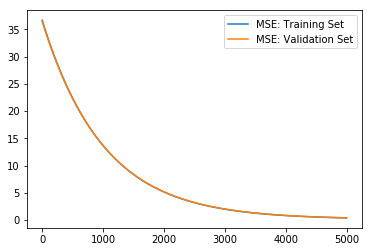

In [100]:
import csv
import numpy as np
import matplotlib.pyplot as plt


def read_file(fp):
    """
    Read in a csv file and return numpy arrays for x and y values.
    :param fp:
    :return:
    """
    x = []
    y = []
    with open(fp, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
    return np.array(x), np.array(y)

def computeEpoch(step_size, w0, w1, x_shuffled, y_shuffled):
    """
    Perform one sweep of all examples in the provided set
    """
    for i,x in enumerate(x_shuffled):
        w0 = w0 - step_size*(w0+w1*x - y_shuffled[i] )
        w1 = w1 - step_size*(w0+w1*x - y_shuffled[i] ) * x
    
    return w0, w1
    
    
def shuffleLists(x,y):
    """
    Shuffle provided lists in unison.
    """
    s = np.arange(x.shape[0])
    np.random.shuffle(s)
    return x[s], y[s]
    
def computeLoss(w0, w1, x_list, y_list):
    """
    Compute loss function for provided parametres and examples.
    """
    n = x_list.shape[0]
    sum=0
    
    for i,x in enumerate(x_list):
        sum += (w0 + w1*x - y_list[i])**2
        
    return sum / (2*n)

    
if __name__ == '__main__':
    step_size = 1e-6

    x,y = read_file('data/Dataset_2_train.csv')
    w0, w1 = (0.4, 0.8)
    
    mse_training, mse_valid = [], []
    
    print("SCROLL DOWN FOR PLOT")
    
    for i in range(5000):
        x, y = shuffleLists(x,y)
        w0, w1 = computeEpoch(step_size, w0, w1, x, y)
        loss2 = computeLoss(w0, w1, x, y)
        mse_training.append(loss2* 2)
        x_valid, y_valid = read_file('data/Dataset_2_valid.csv')
        mse_valid.append(computeLoss(w0, w1, x_valid, y_valid) * 2)
        print("MSE for Epoch #{}: {}".format(i+1, mse_valid[i]))
        
    
    print("\nPerformance on Validation: {:f}".format(mse_valid[-1]))    
    # Plot data:
    plt.plot(range(len(mse_training)), mse_training)
    plt.plot(range(len(mse_valid)), mse_valid)
    plt.legend(['MSE: Training Set', 'MSE: Validation Set'])
    plt.show()


### Question 3-2: Testing chosen fit. (Stepsize 1.00E-02)
**Comparision Table in report**

In [99]:
import csv
import numpy as np
import matplotlib.pyplot as plt


def read_file(fp):
    """
    Read in a csv file and return numpy arrays for x and y values.
    :param fp:
    :return:
    """
    x = []
    y = []
    with open(fp, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
    return np.array(x), np.array(y)

def computeEpoch(step_size, w0, w1, x_shuffled, y_shuffled):
    """
    Perform one sweep of all examples in the provided set
    """
    for i,x in enumerate(x_shuffled):
        w0 = w0 - step_size*(w0+w1*x - y_shuffled[i] )
        w1 = w1 - step_size*(w0+w1*x - y_shuffled[i] ) * x
    
    return w0, w1
    
    
def shuffleLists(x,y):
    """
    Shuffle provided lists in unison.
    """
    s = np.arange(x.shape[0])
    np.random.shuffle(s)
    return x[s], y[s]
    
def computeLoss(w0, w1, x_list, y_list):
    """
    Compute loss function for provided parametres and examples.
    """
    n = x_list.shape[0]
    sum=0
    
    for i,x in enumerate(x_list):
        sum += (w0 + w1*x - y_list[i])**2
        
    return sum / (2*n)

    
if __name__ == '__main__':
    step_size = 1e-2

    x,y = read_file('data/Dataset_2_train.csv')
    w0, w1 = (0.4, 0.8)
    
    mse_training = []
    
    epoch_snaps = 500
    
    for i in range(5000):
        x, y = shuffleLists(x,y)
        w0, w1 = computeEpoch(step_size, w0, w1, x, y)
        loss2 = computeLoss(w0, w1, x, y)
        mse_training.append(loss2* 2)
        
    x,y = read_file('data/Dataset_2_test.csv')
    print("Model MSE (Test Set): {:f}".format(computeLoss(w0, w1, x, y)*2))
    


Model MSE (Test Set): 0.069332


### Question3-3: Visualizing Epochs

**Script found below, screen caps found in report.**

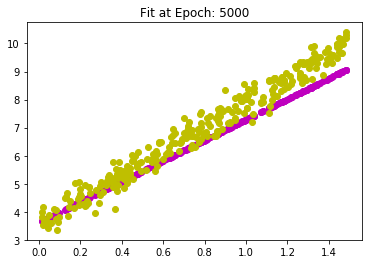

Model MSE (Test Set): 0.344107


In [100]:
import csv
import numpy as np
import matplotlib.pyplot as plt


def read_file(fp):
    """
    Read in a csv file and return numpy arrays for x and y values.
    :param fp:
    :return:
    """
    x = []
    y = []
    with open(fp, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
    return np.array(x), np.array(y)

def computeEpoch(step_size, w0, w1, x_shuffled, y_shuffled):
    """
    Perform one sweep of all examples in the provided set
    """
    for i,x in enumerate(x_shuffled):
        w0 = w0 - step_size*(w0+w1*x - y_shuffled[i] )
        w1 = w1 - step_size*(w0+w1*x - y_shuffled[i] ) * x
    
    return w0, w1
    
    
def shuffleLists(x,y):
    """
    Shuffle provided lists in unison.
    """
    s = np.arange(x.shape[0])
    np.random.shuffle(s)
    return x[s], y[s]
    
def computeLoss(w0, w1, x_list, y_list):
    """
    Compute loss function for provided parametres and examples.
    """
    n = x_list.shape[0]
    sum=0
    
    for i,x in enumerate(x_list):
        sum += (w0 + w1*x - y_list[i])**2
        
    return sum / (2*n)

    
if __name__ == '__main__':
    step_size = 1e-6

    x,y = read_file('data/Dataset_2_train.csv')
    w0, w1 = (0.4, 0.8)
    
    mse_training = []
    
    epoch_snap = 4999
    
    for i in range(5000):
        x, y = shuffleLists(x,y)
        w0, w1 = computeEpoch(step_size, w0, w1, x, y)
        loss2 = computeLoss(w0, w1, x, y)
        mse_training.append(loss2* 2)
        if i == epoch_snap:
            x_plot, y_comp = read_file('data/Dataset_2_train.csv')
            y_plot = [w0 + w1*x for x in x_plot]
            plt.plot(x_plot, y_plot, 'mo')
            plt.plot(x_plot, y_comp, 'yo')
            plt.title('Fit at Epoch: {:d}'.format(epoch_snap+1))
            plt.show()
        
    x,y = read_file('data/Dataset_2_test.csv')
    print("Model MSE (Test Set): {:f}".format(computeLoss(w0, w1, x, y)*2))
    


## Question 4 - Real Life Dataset
### Question 4-1: Completing Data

In [89]:
import csv

with open("data/communities.csv") as fin:
    r_list = list(csv.reader(fin))
columns = [1,2]

for c in range(len(r_list[0])):
    with open("data/communities.csv") as fin:
        sum = 0
        counter = 0
        for row in r_list:
            try:
                sum += float(row[c])
                counter += 1
            except ValueError as e:
                continue

        try:
            avg = sum / counter
        except ZeroDivisionError as e:
            print("Already replaced column: {}".format(c))
        
            

        for i, row in enumerate(r_list):
            if row[c] == '?':
                r_list[i][c] = avg


with open("data/communities.csv", "w", newline='') as fout:
    writer = csv.writer(fout)
    writer.writerows(r_list)

Already replaced column: 3


**Using Median instead of Mean**:
    

In [97]:
import csv

with open("data/communities.csv") as fin:
    r_list = list(csv.reader(fin))
columns = [1,2]

for c in range(len(r_list[0])):
    with open("data/communities.csv") as fin:
        max, min = float(row[0]), float(row[0])
        for row in r_list:
            try:
                if max < float(row[c]):
                    max = float(row[c])
                if min > float(row[c]):
                    min = float(row[c])
            except ValueError as e:
                continue

        try:
            med = (max - min)/ 2
        except ZeroDivisionError as e:
            print("Already replaced column: {}".format(c))
        
            

        for i, row in enumerate(r_list):
            if row[c] == '?':
                r_list[i][c] = med


with open("data/communities.csv", "w", newline='') as fout:
    writer = csv.writer(fout)
    writer.writerows(r_list)

56.0
840.0
94597.0
6.0
10.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0


### 2-*: Generating 80-20 Splits

In [98]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/communities.csv')

for i in range(5):
    msk = np.random.rand(len(df)) < 0.8
    train = df[msk]
    test = df[~msk]
    train.to_csv('data/CandC-train{:d}.csv'.format(i+1))
    test.to_csv('data/CandC-test{:d}.csv'.format(i+1))
